In [5]:
#importing libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [6]:
#fetch imges count from folders

In [7]:
count = 0
dirs = os.listdir('images/')
for dir in dirs:
    files = list(os.listdir('images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')   

daisy Folder has 86 Images
dandelion Folder has 84 Images
rose Folder has 98 Images
sunflower Folder has 94 Images
tulip Folder has 80 Images
Images Folder has 442 Images


In [8]:
#load images into arrays as dataset

In [9]:
base_dir = 'images/'
img_size = 180
batch = 32

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size = batch,
                                                       image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size = batch,
                                                       image_size=(img_size,img_size))

Found 441 files belonging to 5 classes.
Using 353 files for training.
Found 441 files belonging to 5 classes.
Using 88 files for validation.


In [11]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [14]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------

In [12]:
import matplotlib.pyplot as plt

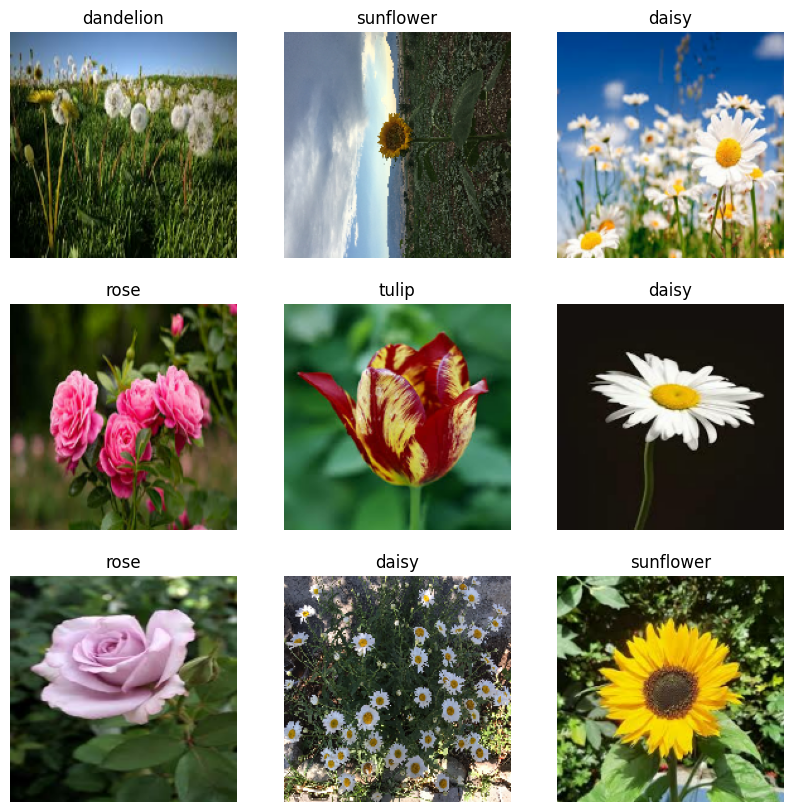

In [16]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)

In [19]:
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

In [20]:
#data augmentation

In [21]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

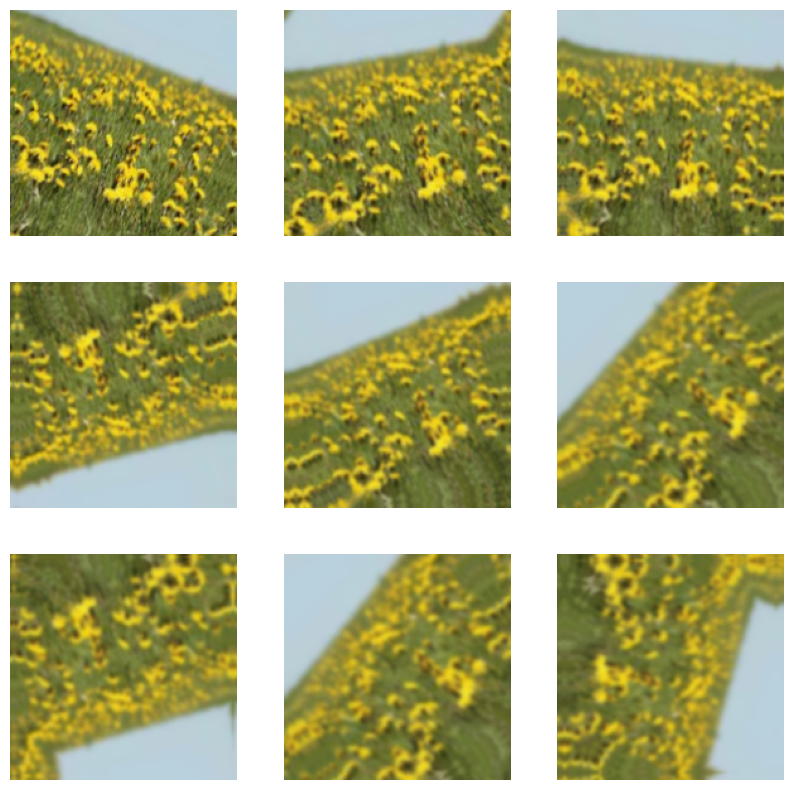

In [34]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [35]:
#model creation

In [36]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 45, 45, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(train_ds, epochs=60, validation_data=val_ds)

Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.6781 - loss: 0.7941 - val_accuracy: 0.3864 - val_loss: 2.4850
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.7335 - loss: 0.7882 - val_accuracy: 0.6364 - val_loss: 1.3122
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.6992 - loss: 0.8103 - val_accuracy: 0.5341 - val_loss: 1.6908
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.7250 - loss: 0.7197 - val_accuracy: 0.5909 - val_loss: 1.3558
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.7672 - loss: 0.6330 - val_accuracy: 0.5682 - val_loss: 1.5601
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.7531 - loss: 0.7033 - val_accuracy: 0.5795 - val_loss: 1.4276
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.7339 - loss: 0.7157 - val_accuracy: 0.6364 - val_loss: 1.3665
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.7608 - loss: 0.6457 - val_accuracy: 0.

In [49]:
def classify_images(images_path):
    input_image = tf.keras.utils.load_img(images_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The image is classified as a ' + flower_names[np.argmax(result)] + ' with a confidence score of ' + str(np.max(result)*100)
    return outcome

In [50]:
classify_images('samples/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'The image is classified as a rose with a confidence score of 99.99932'

In [51]:
model.save('Flower_Recog.h5')

In [48]:
model.save('Flower_Recog_Model.keras')